In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
movie_df = pd.read_csv("Movie.csv")
movie_df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [115]:
# Verify that a single userid has rated more than once
movie_df[movie_df["userId"]==11]

,userId,movie,rating
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5


In [119]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userId  8992 non-null   int64  
 1   movie   8992 non-null   object 
 2   rating  8992 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.9+ KB


                                movie  count
0                    Toy Story (1995)   2569
1                    GoldenEye (1995)   1548
2                         Heat (1995)   1260
3                      Jumanji (1995)   1155
4                      Sabrina (1995)    700
5             Grumpier Old Men (1995)    685
6  Father of the Bride Part II (1995)    657
7                 Sudden Death (1995)    202
8            Waiting to Exhale (1995)    138
9                 Tom and Huck (1995)     78


<Axes: xlabel='Movies', ylabel='Counts'>

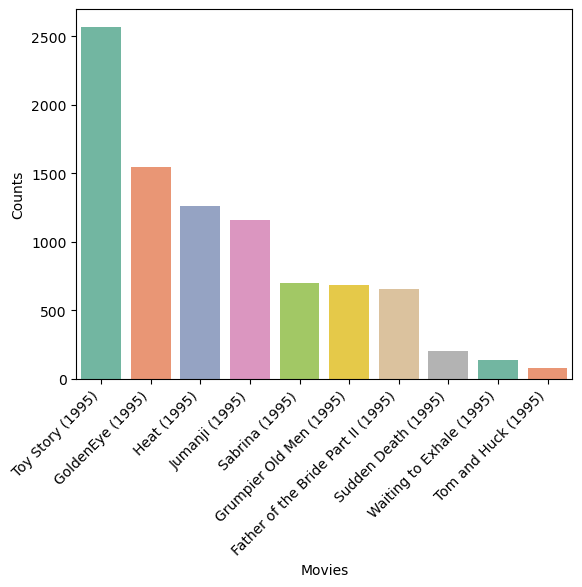

In [121]:
counts =movie_df['movie'].value_counts().reset_index()
print(counts)
columns=["movie","counts"]
plt.xlabel("Movies")
plt.ylabel("Counts")
plt.xticks(rotation=45,ha='right')
sns.barplot(data=counts,x="movie",y='count',hue='movie',palette="Set2")

In [123]:
print(movie_df.userId.unique())
len(movie_df.userId.unique())

[   3    6    8 ... 7080 7087 7105]


4081

In [125]:
movie_df.sort_values('userId')

,userId,movie,rating
2569,1,Jumanji (1995),3.5
3724,2,Grumpier Old Men (1995),4.0
0,3,Toy Story (1995),4.0
5204,4,Heat (1995),3.0
7444,4,GoldenEye (1995),4.0
...,...,...,...
6463,7117,Heat (1995),5.0
2567,7119,Toy Story (1995),5.0
2568,7120,Toy Story (1995),4.5
3723,7120,Jumanji (1995),4.0


   rating  count
0     3.0   2736
1     4.0   2660
2     5.0   1394
3     3.5    679
4     2.0    542
5     4.5    374
6     2.5    277
7     1.0    212
8     1.5     61
9     0.5     57


AttributeError: Rectangle.set() got an unexpected keyword argument 'palatte'

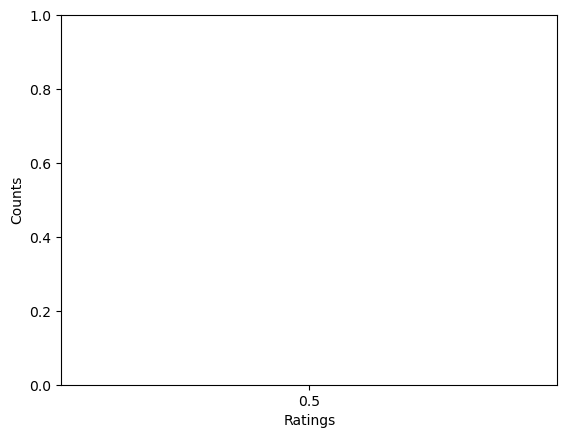

In [145]:
counts=movie_df['rating'].value_counts().reset_index()
print(counts)
plt.xlabel('Ratings')
plt.ylabel("Counts")
sns.barplot(data=counts,x='rating',hue='rating',y='count',palatte="Set2")

In [ ]:
user_movie_df=movie_df.pivot_table(index='userId',columns='movie',values='rating')

In [ ]:
user_movie_df

In [ ]:
user_movie_df.fillna(0, inplace=True)

In [ ]:
user_movie_df

In [ ]:
# calculating cosine similarity between users
from sklearn.metrics import pairwise_distances
#from scipy.spatial.distance import cosine, correaltion

In [ ]:
user_sim=1-pairwise_distances(user_movie_df.values, metric='cosine')

In [ ]:
user_sim

In [ ]:
user_movie_df.fillna(0, inplace=True)

In [ ]:
user_movie_df

In [ ]:
user_sim.shape

In [ ]:
np.fill_diagonal(user_sim, 0)
user_sim

In [136]:
# Store the results in a dataframe
user_sim_df=pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [139]:
movies_df.userId.unique()

array([   3,    6,    8, ..., 7080, 7087, 7105], dtype=int64)

In [141]:
# Set the index and column names to user ids
user_sim_df.index=movies_df.userId.unique()
user_sim_df.columns=movies_df.userId.unique()

In [143]:
user_sim_df

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7070,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7080,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7087,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [147]:
user_sim_df.idxmax(axis=1)[0:50]

3        11
6       168
8        16
10     4047
11        3
12     6676
13     5953
14     4138
16        8
19     3603
22     3003
23     2096
24      539
31       66
34       93
39       53
47      258
53       39
54     2912
58        8
59     4154
66       31
69     1108
80      298
82        8
84      155
90     1024
91     1175
93       34
96      116
97     5826
99        8
105      39
107       8
109    3486
114    6093
115       8
116      96
117       8
124      31
126      31
129    5884
130    6203
131    3196
133    6676
134       8
135       8
136    5023
137     474
140    4980
dtype: int64